https://alyssaq.github.io/2015/visualising-matrices-and-affine-transformations-with-python/
https://stackabuse.com/affine-image-transformations-in-python-with-numpy-pillow-and-opencv/

In [25]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [18]:
def plot_points(matrix, ls='--', lw=1.2, colors=None):
  x_points, y_points = matrix
  size = len(x_points)
  colors = ['red', 'blue', 'orange', 'green'] if not None else colors
  for i in range(size):
    plt.plot(x_points[i], y_points[i], color=colors[i], marker='o')
    plt.plot([x_points[i], x_points[(i+1) % size]], 
             [y_points[i], y_points[(i+1) % size]], 
             color=colors[i], 
             linestyle=ls, linewidth=lw)

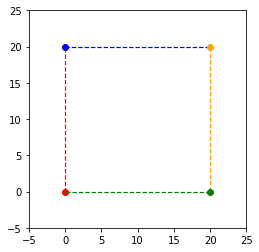

In [22]:
fig, ax = plt.subplots()

x_points = np.array([0, 0, 20, 20])
y_points = np.array([0, 20, 20, 0])
matrix = np.array([x_points, y_points])
colors = ['red', 'blue', 'orange', 'green']
plot_points(matrix, colors=colors)
ax.set_ylim([-5,25])
ax.set_xlim([-5,25])
ax.set_aspect('equal')
plt.show()

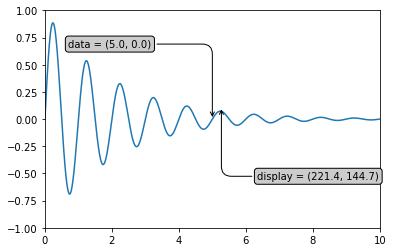

In [23]:
x = np.arange(0, 10, 0.005)
y = np.exp(-x/2.) * np.sin(2*np.pi*x)

fig, ax = plt.subplots()
ax.plot(x, y)
ax.set_xlim(0, 10)
ax.set_ylim(-1, 1)

xdata, ydata = 5, 0
# This computing the transform now, if anything
# (figure size, dpi, axes placement, data limits, scales..)
# changes re-calling transform will get a different value.
xdisplay, ydisplay = ax.transData.transform((xdata, ydata))

bbox = dict(boxstyle="round", fc="0.8")
arrowprops = dict(
    arrowstyle="->",
    connectionstyle="angle,angleA=0,angleB=90,rad=10")

offset = 72
ax.annotate('data = (%.1f, %.1f)' % (xdata, ydata),
            (xdata, ydata), xytext=(-2*offset, offset), textcoords='offset points',
            bbox=bbox, arrowprops=arrowprops)

disp = ax.annotate('display = (%.1f, %.1f)' % (xdisplay, ydisplay),
                   (xdisplay, ydisplay), xytext=(0.5*offset, -offset),
                   xycoords='figure pixels',
                   textcoords='offset points',
                   bbox=bbox, arrowprops=arrowprops)

plt.show()

In [24]:
import matplotlib.pyplot as plt
import numpy as np
import string

# points a, b and, c
a, b, c, d = (0, 1, 0), (1, 0, 1), (0, -1, 2), (-1, 0, 3)

# matrix with row vectors of points
A = np.array([a, b, c, d])

# 3x3 Identity transformation matrix
I = np.eye(3)

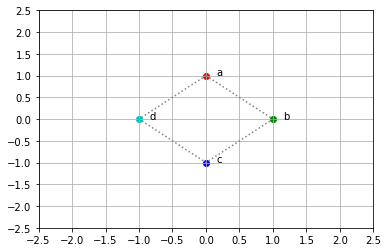

In [26]:
color_lut = 'rgbc'
fig = plt.figure()
ax = plt.gca()
xs = []
ys = []
for row in A:
    output_row = I @ row
    x, y, i = output_row
    xs.append(x)
    ys.append(y)
    i = int(i) # convert float to int for indexing
    c = color_lut[i]
    plt.scatter(x, y, color=c)
    plt.text(x + 0.15, y, f"{string.ascii_letters[i]}")
xs.append(xs[0])
ys.append(ys[0])
plt.plot(xs, ys, color="gray", linestyle='dotted')
ax.set_xticks(np.arange(-2.5, 3, 0.5))
ax.set_yticks(np.arange(-2.5, 3, 0.5))
plt.grid()
plt.show()

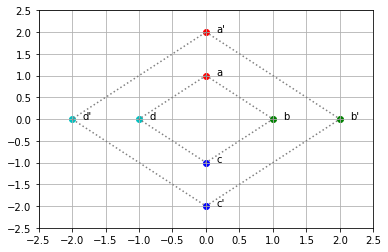

In [27]:
T_s = np.array([[2, 0, 0], [0, 2, 0], [0, 0, 1]])

fig = plt.figure()
ax = plt.gca()
xs_s = []
ys_s = []
for row in A:
    output_row = T_s @ row
    x, y, i = row
    x_s, y_s, i_s = output_row
    xs_s.append(x_s)
    ys_s.append(y_s)
    i, i_s = int(i), int(i_s) # convert float to int for indexing
    c, c_s = color_lut[i], color_lut[i_s] # these are the same but, its good to be explicit
    plt.scatter(x, y, color=c)
    plt.scatter(x_s, y_s, color=c_s)
    plt.text(x + 0.15, y, f"{string.ascii_letters[int(i)]}")
    plt.text(x_s + 0.15, y_s, f"{string.ascii_letters[int(i_s)]}'")

xs_s.append(xs_s[0])
ys_s.append(ys_s[0])
plt.plot(xs, ys, color="gray", linestyle='dotted')
plt.plot(xs_s, ys_s, color="gray", linestyle='dotted')
ax.set_xticks(np.arange(-2.5, 3, 0.5))
ax.set_yticks(np.arange(-2.5, 3, 0.5))
plt.grid()
plt.show()

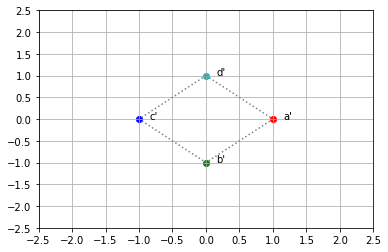

In [28]:
# create the rotation transformation matrix
T_r = np.array([[0, 1, 0], [-1, 0, 0], [0, 0, 1]])

fig = plt.figure()
ax = plt.gca()
for row in A:
    output_row = T_r @ row
    x_r, y_r, i_r = output_row
    i_r = int(i_r) # convert float to int for indexing
    c_r = color_lut[i_r] # these are the same but, its good to be explicit
    letter_r = string.ascii_letters[i_r]
    plt.scatter(x_r, y_r, color=c_r)
    plt.text(x_r + 0.15, y_r, f"{letter_r}'")

plt.plot(xs, ys, color="gray", linestyle='dotted')
ax.set_xticks(np.arange(-2.5, 3, 0.5))
ax.set_yticks(np.arange(-2.5, 3, 0.5))
plt.grid()
plt.show()

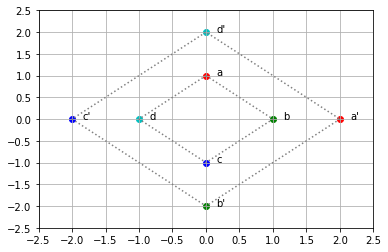

In [29]:
# create combined tranformation matrix
T = T_s @ T_r

fig = plt.figure()
ax = plt.gca()

xs_comb = []
ys_comb = []
for row in A:
    output_row = T @ row
    x, y, i = row
    x_comb, y_comb, i_comb = output_row
    xs_comb.append(x_comb)
    ys_comb.append(y_comb)
    i, i_comb = int(i), int(i_comb) # convert float to int for indexing
    c, c_comb = color_lut[i], color_lut[i_comb] # these are the same but, its good to be explicit
    letter, letter_comb = string.ascii_letters[i], string.ascii_letters[i_comb]
    plt.scatter(x, y, color=c)
    plt.scatter(x_comb, y_comb, color=c_comb)
    plt.text(x + 0.15 , y, f"{letter}")
    plt.text(x_comb + 0.15, y_comb, f"{letter_comb}'")
xs_comb.append(xs_comb[0])
ys_comb.append(ys_comb[0])
plt.plot(xs, ys, color="gray", linestyle='dotted')
plt.plot(xs_comb, ys_comb, color="gray", linestyle='dotted')
ax.set_xticks(np.arange(-2.5, 3, 0.5))
ax.set_yticks(np.arange(-2.5, 3, 0.5))
plt.grid()
plt.show()

In [31]:
img = plt.imread('letterR.jpeg')
img.shape

(1000, 1000, 4)

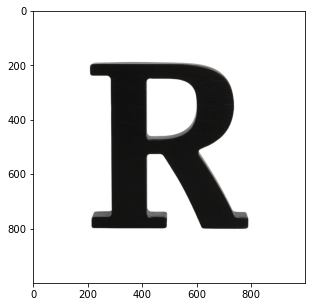

In [32]:
plt.figure(figsize=(5, 5))
plt.imshow(img)

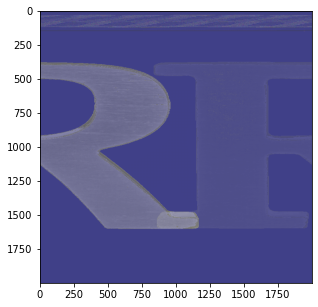

In [34]:
# 2x scaling requires a tranformation image array 2x the original image
img_transformed = np.empty((2000, 2000, 4), dtype=np.uint8)
for i, row in enumerate(img):
    for j, col in enumerate(row):
        pixel_data = img[i, j, :]
        input_coords = np.array([i, j, 1])
        i_out, j_out, _ = T @ input_coords
        img_transformed[i_out, j_out, :] = pixel_data

plt.figure(figsize=(5, 5))
plt.imshow(img_transformed)

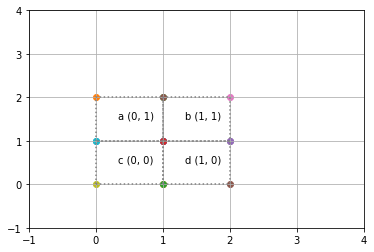

In [35]:
def plot_box(plt, x0, y0, txt, w=1, h=1):
    plt.scatter(x0, y0)
    plt.scatter(x0, y0 + h)
    plt.scatter(x0 + w, y0 + h)
    plt.scatter(x0 + w, y0)
    plt.plot([x0, x0, x0 + w, x0 + w, x0], [y0, y0 + h, y0 + h, y0, y0], color="gray", linestyle='dotted')
    plt.text(x0 + (.33 * w), y0 + (.5 * h), txt)

#             x0, y0, letter
a = np.array((0,  1,  0))
b = np.array((1,  1,  1))
c = np.array((0,  0,  2))
d = np.array((1,  0,  3))

A = np.array([a, b, c, d])
fig = plt.figure()
ax = plt.gca()
for pt in A:
    x0, y0, i = I @ pt
    x0, y0, i = int(x0), int(y0), int(i)
    plot_box(plt, x0, y0, f"{string.ascii_letters[int(i)]} ({x0}, {y0})")

ax.set_xticks(np.arange(-1, 5, 1))
ax.set_yticks(np.arange(-1, 5, 1))
plt.grid()
plt.show()

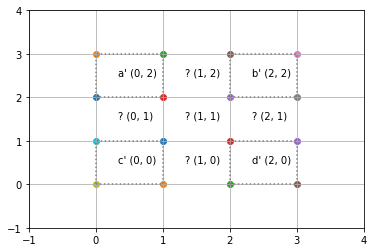

In [36]:
fig = plt.figure()
ax = plt.gca()
for pt in A:
    xt, yt, i = T_s @ pt
    xt, yt, i = int(xt), int(yt), int(i)
    plot_box(plt, xt, yt, f"{string.ascii_letters[i]}' ({xt}, {yt})")

delta_w, delta_h = 0.33, 0.5
plt.text(0 + delta_w, 1 + delta_h, "? (0, 1)")
plt.text(1 + delta_w, 0 + delta_h, "? (1, 0)")
plt.text(1 + delta_w, 1 + delta_h, "? (1, 1)")
plt.text(1 + delta_w, 2 + delta_h, "? (1, 2)")
plt.text(2 + delta_w, 1 + delta_h, "? (2, 1)")

ax.set_xticks(np.arange(-1, 5, 1))
ax.set_yticks(np.arange(-1, 5, 1))
plt.grid()
plt.show()

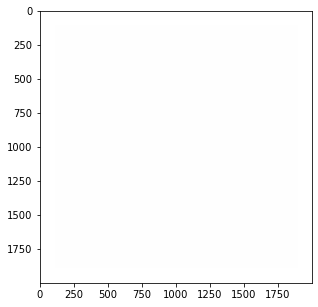

In [37]:
T_inv = np.linalg.inv(T)

# nearest neighbors interpolation
def nearest_neighbors(i, j, M, T_inv):
    x_max, y_max = M.shape[0] - 1, M.shape[1] - 1
    x, y, _ = T_inv @ np.array([i, j, 1])
    if np.floor(x) == x and np.floor(y) == y:
        x, y = int(x), int(y)
        return M[x, y]
    if np.abs(np.floor(x) - x) < np.abs(np.ceil(x) - x):
        x = int(np.floor(x))
    else:
        x = int(np.ceil(x))
    if np.abs(np.floor(y) - y) < np.abs(np.ceil(y) - y):
        y = int(np.floor(y))
    else:
        y = int(np.ceil(y))
    if x > x_max:
        x = x_max
    if y > y_max:
        y = y_max
    return M[x, y,]

img_nn = np.empty((2000, 2000, 4), dtype=np.uint8)
for i, row in enumerate(img_transformed):
    for j, col in enumerate(row):
        img_nn[i, j, :] = nearest_neighbors(i, j, img, T_inv)

plt.figure(figsize=(5, 5))
plt.imshow(img_nn)